In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Chargement des données
df = pd.read_csv("resale-flat-prices-2022-jan.csv", sep=',', encoding='utf-8')


# Configuration de style des graphiques :
Ces lignes définissent un style cohérent pour les graphiques avec Seaborn et ajustent la taille par défaut des figures à 12x6 pouces pour une meilleure lisibilité.

In [ ]:
# Configuration de style pour les graphiques
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Aperçu des données
print("Aperçu des premières lignes du dataset:")
display(df.head())

Aperçu des premières lignes du dataset:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2022-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1977,54 years 05 months,245000.0
1,2022-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,54 years 05 months,358000.0
2,2022-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,55 years 01 month,355000.0
3,2022-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,58 years,338000.0
4,2022-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,82.0,New Generation,1980,57 years 02 months,420000.0


# Vérification de la structure des données :

Affiche la taille du DataFrame (lignes et colonnes) et fournit des informations détaillées sur les colonnes, leurs types et les valeurs manquantes.

In [ ]:
# Vérification de la structure du DataFrame
print(f"\nTaille des données: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\nInformations générales sur les colonnes et types de données:")
df.info()


Taille des données: 2442 lignes, 11 colonnes

Informations générales sur les colonnes et types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                2442 non-null   object 
 1   town                 2442 non-null   object 
 2   flat_type            2442 non-null   object 
 3   block                2442 non-null   object 
 4   street_name          2442 non-null   object 
 5   storey_range         2442 non-null   object 
 6   floor_area_sqm       2442 non-null   float64
 7   flat_model           2442 non-null   object 
 8   lease_commence_date  2442 non-null   int64  
 9   remaining_lease      2442 non-null   object 
 10  resale_price         2442 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 210.0+ KB


# Vérification des valeurs manquantes:

Compte le nombre de valeurs manquantes dans chaque colonne du DataFrame pour identifier les colonnes nécessitant un traitement.

In [ ]:
#Vérifiez s'il existe des valeurs manquantes dans chaque colonne
print(df.isnull().sum())


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


# Analyse univariée :
- Étude d'une seule variable pour résumer ses caractéristiques principales, comme la distribution, la tendance centrale, ou la dispersion.

# Distribution des catégories de flat_type :
- Visualise la fréquence de chaque catégorie dans la colonne flat_type à l'aide d'un graphique en barres.

# Visualisation de la distribution des surfaces :
- Affiche un histogramme pour examiner la répartition des valeurs dans la colonne floor_area_sqm, avec 30 intervalles (bins).


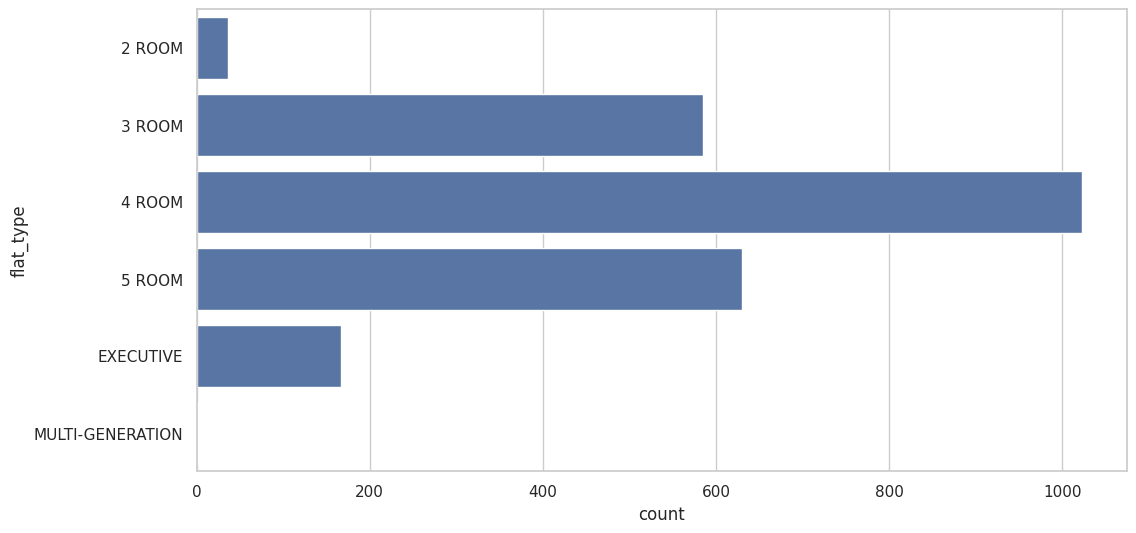

In [ ]:
#afficher la fréquence de chaque catégorie
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['flat_type'])
plt.show()


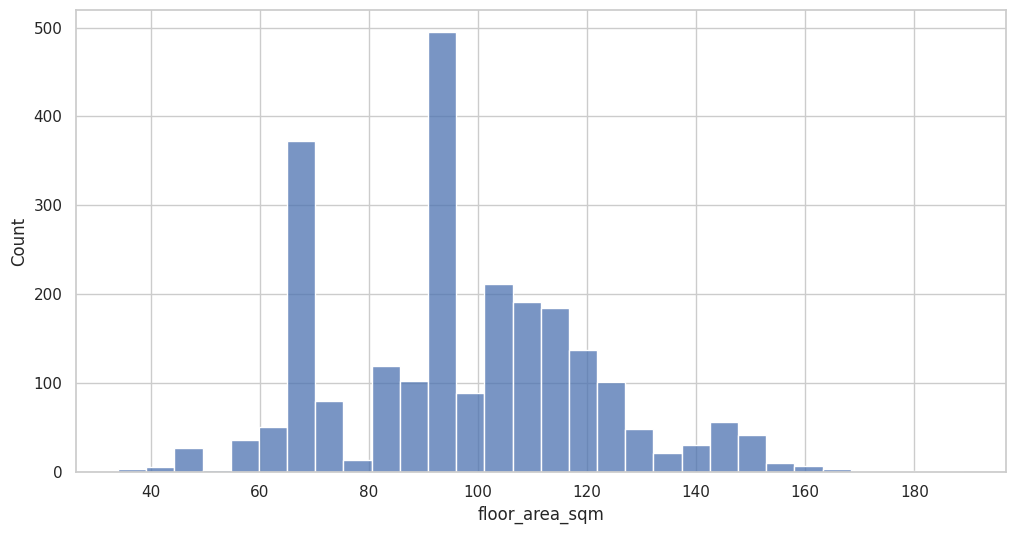

In [ ]:
sns.histplot(df['floor_area_sqm'], bins=30)
plt.show()


# Analyse bivariée
- Étude de la relation entre deux variables pour identifier des corrélations ou des tendances.
- la corrélation mesure la relation entre deux colonnes, indiquant si elles varient ensemble (positivement ou négativement) ou indépendamment.

# Relation entre resale_price et floor_area_sqm :
- Visualise la corrélation entre la surface de l'appartement et son prix de revente à l'aide d'un nuage de points.

# Moyenne des prix de revente par type d'appartement :
- Calcule et affiche la moyenne des prix de revente pour chaque catégorie de flat_type.

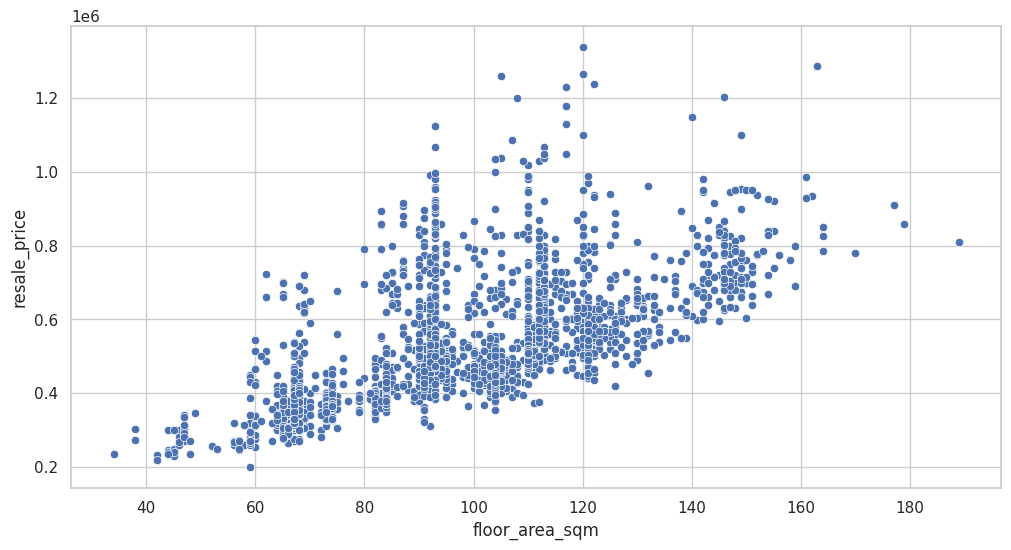

In [ ]:
#explorer la relation entre resale_price et d'autres variables numériques comme floor_area_sqm
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df)
plt.show()


In [ ]:
#Analysez la moyenne des prix de revente par type d’appartement
avg_price_by_flat_type = df.groupby('flat_type')['resale_price'].mean()
print(avg_price_by_flat_type)

flat_type
2 ROOM              277336.722222
3 ROOM              372747.536735
4 ROOM              524633.498534
5 ROOM              624385.430159
EXECUTIVE           751777.365269
MULTI-GENERATION    785000.000000
Name: resale_price, dtype: float64


# Traitement de la variable remaining_lease

Cette fonction convertit la colonne remaining_lease (qui contient des informations sur la durée restante du bail en années et mois) en années sous forme décimale, puis l'applique à chaque valeur de la colonne pour créer une nouvelle colonne remaining_lease_years.

In [ ]:
def convert_lease_to_years(lease_str):
    years, months = 0, 0
    if 'year' in lease_str:
        years = int(lease_str.split('year')[0].strip())
    if 'month' in lease_str:
        months = int(lease_str.split('month')[0].split()[-1].strip())
    return years + months / 12

df['remaining_lease_years'] = df['remaining_lease'].apply(convert_lease_to_years)
df['remaining_lease_years']

,remaining_lease_years
0,54.416667
1,54.416667
2,55.083333
3,58.000000
4,57.166667
...,...
2437,65.583333
2438,65.916667
2439,65.833333
2440,69.500000


# Corrélations générales:
- Calcule et visualise la matrice de corrélation entre les variables numériques du DataFrame à l'aide d'un graphique en heatmap, mettant en évidence les relations linéaires entre les colonnes.

- Un graphique heatmap est une représentation visuelle de données où les valeurs sont affichées sous forme de couleurs, permettant de visualiser facilement les relations ou les intensités entre différentes variables dans un tableau ou une matrice.

# loor_area_sqm et resale_price :
Une corrélation modérée positive (0.67), indiquant que plus la superficie est grande, plus le prix de revente est élevé.
# lease_commence_date et resale_price :
Corrélation faible (0.37), ce qui suggère qu'il existe une relation légère entre la date de commencement de la location et le prix de revente.
# remaining_lease_years et resale_price :
Corrélation faible (0.37), indiquant une légère relation entre la durée restante du bail et le prix de revente.
# floor_area_sqm et remaining_lease_years :
 Corrélation très faible (0.079), ce qui signifie qu'il n'y a pratiquement aucune relation linéaire entre la superficie et la durée restante du bail.
# lease_commence_date et remaining_lease_years :
 Corrélation forte (1), indiquant une relation parfaite entre ces deux variables, ce qui est attendu car la date de commencement détermine la durée restante du bail.


## **===> Ce graphique met en évidence les relations linéaires entre les variables numériques du jeu de données.**

In [1]:
# Sélectionner uniquement les colonnes numériques
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = numeric_data.corr()

# Visualiser la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'df' is not defined